In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mutua\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Authinitial Keys
consumerKey = 'NXcySLTzvf96UZfY5zRVdpRxX'
consumerSecret = 'dJSwG1mopqefVZ1VvAeTr9y64zy1SQHdmtjALUyfPTAuCuMdO5'
accessToken = '1346038574010028033-Trz5KkbXmXMGGYpVviiJUFUsZjMaK6'
accessTokenSecret = 'PQ8q2riFNKfKNX3N6saFz0d7JeadG8qgsHs2eMf8wfL0p'

# Authentication
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  KRACorporate
Please enter how many tweets to analyze:  500


In [36]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  18
positive number:  8
negative number:  4
neutral number:  6


In [4]:
tweet_list

['@KeyaMercy @jumaf3 @KRACorporate @StateHouseKenya @MOH_Kenya ARVs are not free. The cost is catered for by donors a… https://t.co/Frnv9CERIh',
 '@PManjeru @jumaf3 @KRACorporate Government is incapable of helping everyone in the Country.  \n\nWhen you realize tha… https://t.co/WsourTkIo6',
 'RT @jumaf3: There is no ARV in Kenya. You know why? Because @KRACorporate is demanding Ksh 530 million in taxes from donors. The drugs have…',
 'RT @jumaf3: There is no ARV in Kenya. You know why? Because @KRACorporate is demanding Ksh 530 million in taxes from donors. The drugs have…',
 'RT @jumaf3: There is no ARV in Kenya. You know why? Because @KRACorporate is demanding Ksh 530 million in taxes from donors. The drugs have…',
 "@kizitowaf @jumaf3 @KRACorporate It should not be government's responsibility to provide ARV's.",
 'RT @jumaf3: There is no ARV in Kenya. You know why? Because @KRACorporate is demanding Ksh 530 million in taxes from donors. The drugs have…',
 "@dayzeesmall @jumaf3 @KRAC

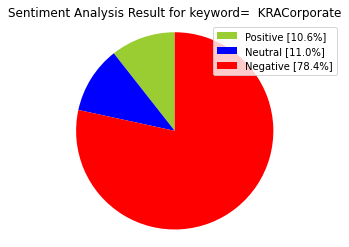

In [5]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [6]:
tweet_list.drop_duplicates(inplace = True)

AttributeError: 'list' object has no attribute 'drop_duplicates'

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [7]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@KeyaMercy @jumaf3 @KRACorporate @StateHouseKe...,@KeyaMercy @jumaf3 @KRACorporate @StateHouseKe...
1,@PManjeru @jumaf3 @KRACorporate Government is ...,@PManjeru @jumaf3 @KRACorporate Government is ...
2,RT @jumaf3: There is no ARV in Kenya. You know...,RT @jumaf3: There is no ARV in Kenya. You know...
3,RT @jumaf3: There is no ARV in Kenya. You know...,RT @jumaf3: There is no ARV in Kenya. You know...
4,RT @jumaf3: There is no ARV in Kenya. You know...,RT @jumaf3: There is no ARV in Kenya. You know...
...,...,...
495,RT @jumaf3: There is no ARV in Kenya. You know...,RT @jumaf3: There is no ARV in Kenya. You know...
496,RT @jumaf3: There is no ARV in Kenya. You know...,RT @jumaf3: There is no ARV in Kenya. You know...
497,Please copy this @KRACare @KRACorporate https:...,Please copy this @KRACare @KRACorporate https:...
498,@jumaf3 @KRACorporate Care to respond to this?...,@jumaf3 @KRACorporate Care to respond to this?...


In [8]:
tweet_list.head()

AttributeError: 'list' object has no attribute 'head'

In [9]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head()

,0,text
0,@KeyaMercy @jumaf3 @KRACorporate @StateHouseKe...,kenya arvs are not free the cost is...
1,@PManjeru @jumaf3 @KRACorporate Government is ...,government is incapable of helping every...
2,RT @jumaf3: There is no ARV in Kenya. You know...,there is no arv in kenya you know why becau...
3,RT @jumaf3: There is no ARV in Kenya. You know...,there is no arv in kenya you know why becau...
4,RT @jumaf3: There is no ARV in Kenya. You know...,there is no arv in kenya you know why becau...


In [10]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@KeyaMercy @jumaf3 @KRACorporate @StateHouseKe...,kenya arvs are not free the cost is...,-0.2,0.8,negative,0.197,0.803,0.000,-0.4023
1,@PManjeru @jumaf3 @KRACorporate Government is ...,government is incapable of helping every...,0.0,0.0,negative,0.165,0.696,0.139,-0.1027
2,RT @jumaf3: There is no ARV in Kenya. You know...,there is no arv in kenya you know why becau...,0.0,0.0,negative,0.170,0.830,0.000,-0.4767
3,RT @jumaf3: There is no ARV in Kenya. You know...,there is no arv in kenya you know why becau...,0.0,0.0,negative,0.170,0.830,0.000,-0.4767
4,RT @jumaf3: There is no ARV in Kenya. You know...,there is no arv in kenya you know why becau...,0.0,0.0,negative,0.170,0.830,0.000,-0.4767
5,@kizitowaf @jumaf3 @KRACorporate It should not...,it should not be government s responsibi...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
6,RT @jumaf3: There is no ARV in Kenya. You know...,there is no arv in kenya you know why becau...,0.0,0.0,negative,0.170,0.830,0.000,-0.4767
7,"@dayzeesmall @jumaf3 @KRACorporate Actually, I...",actually i have talked to someone who s...,0.0,0.1,neutral,0.000,1.000,0.000,0.0000
8,The Kenyan govt through @KRACorporate @KRACare...,the kenyan govt through is busy taxing don...,0.1,0.3,neutral,0.000,1.000,0.000,0.0000
9,@NyeriJ @jumaf3 @KRACorporate How irresponsibl...,how irresponsible are children born with...,0.0,0.0,negative,0.326,0.674,0.000,-0.4404


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,388,77.6
positive,59,11.8
neutral,53,10.6


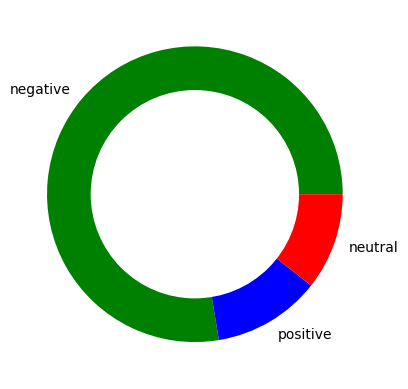

In [15]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


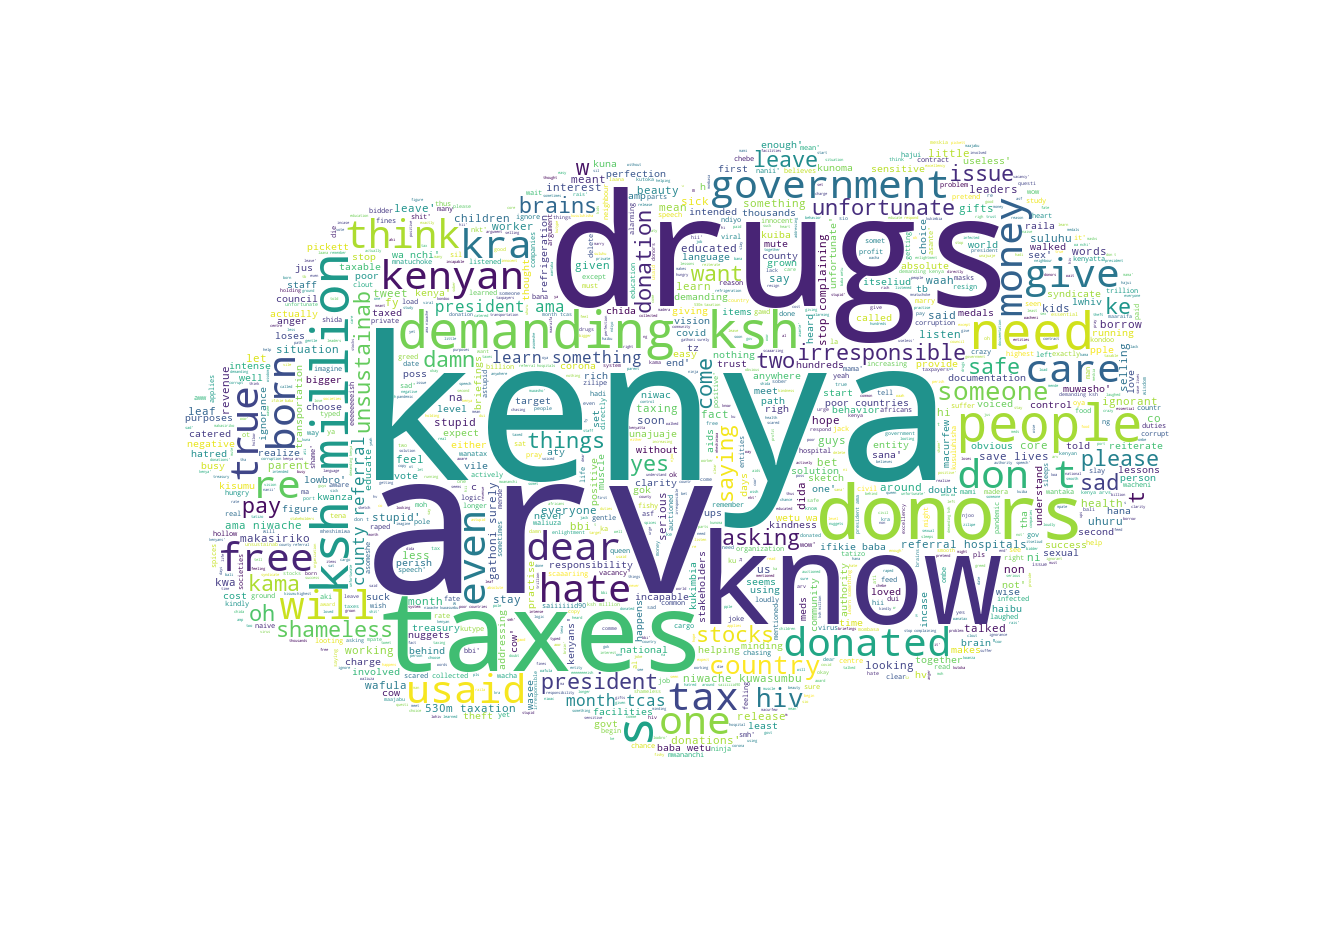

In [19]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


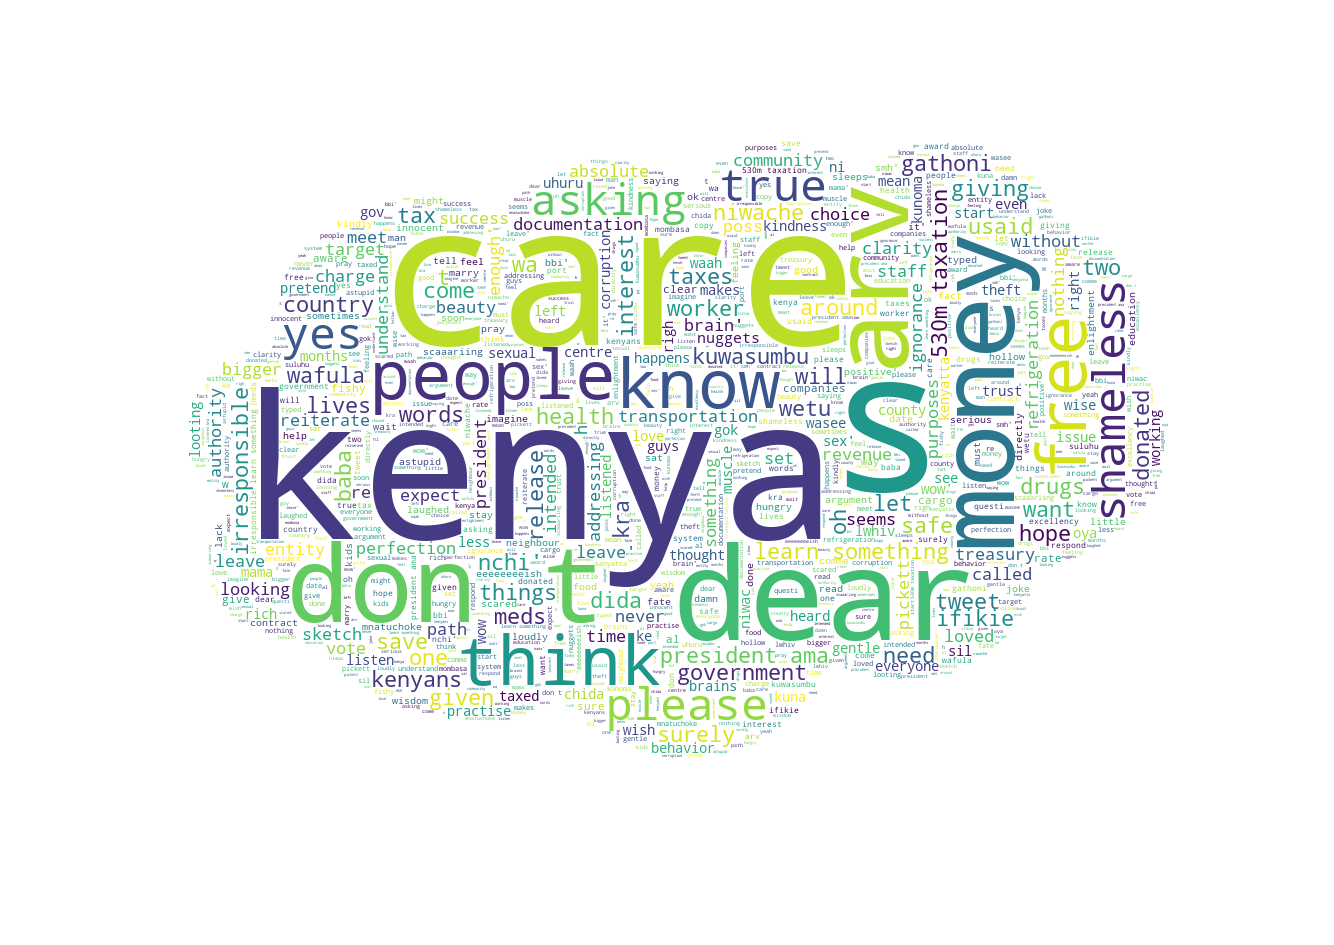

In [18]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


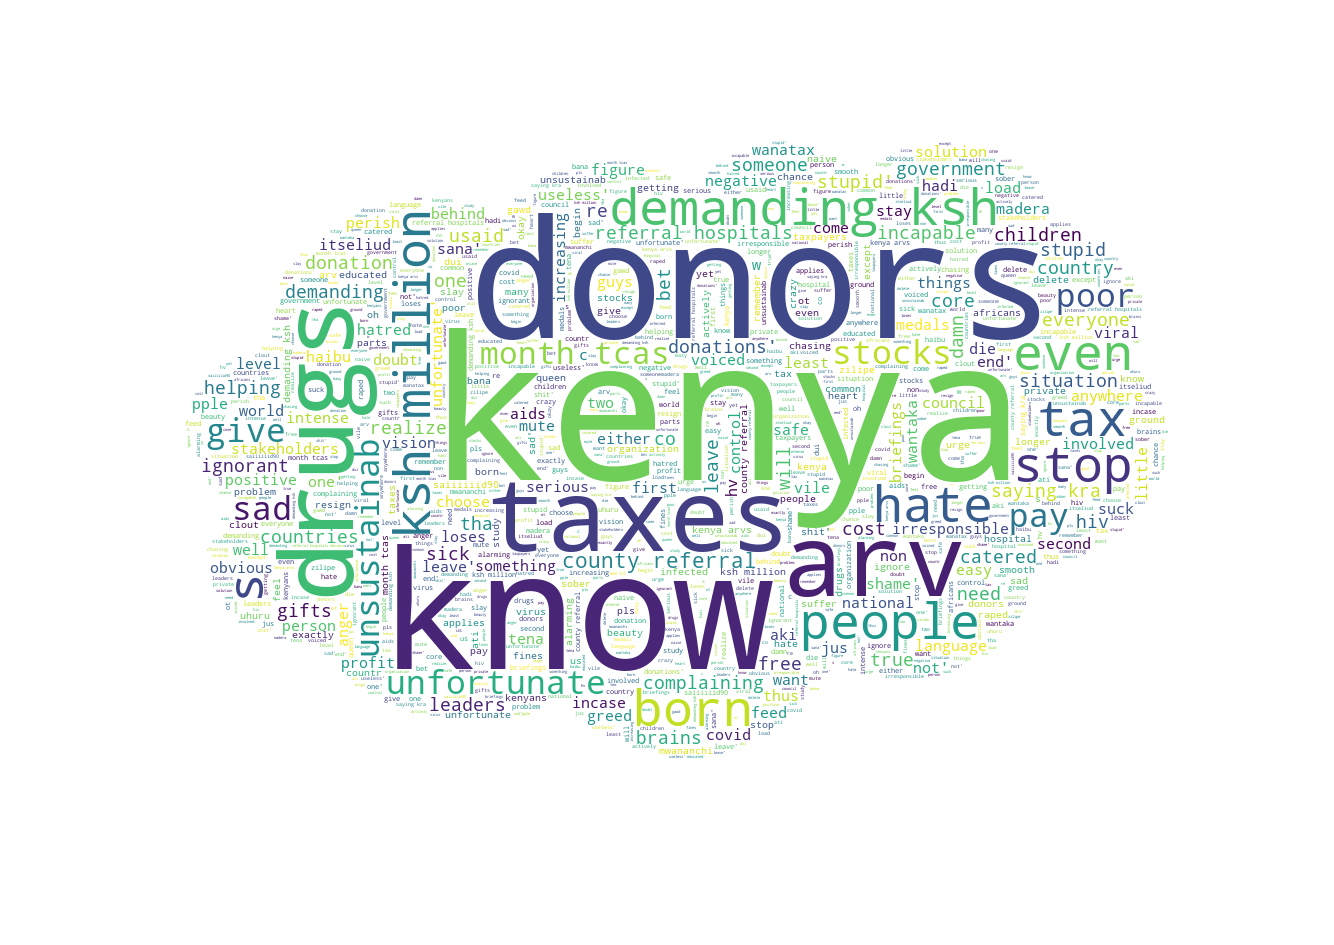

In [21]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


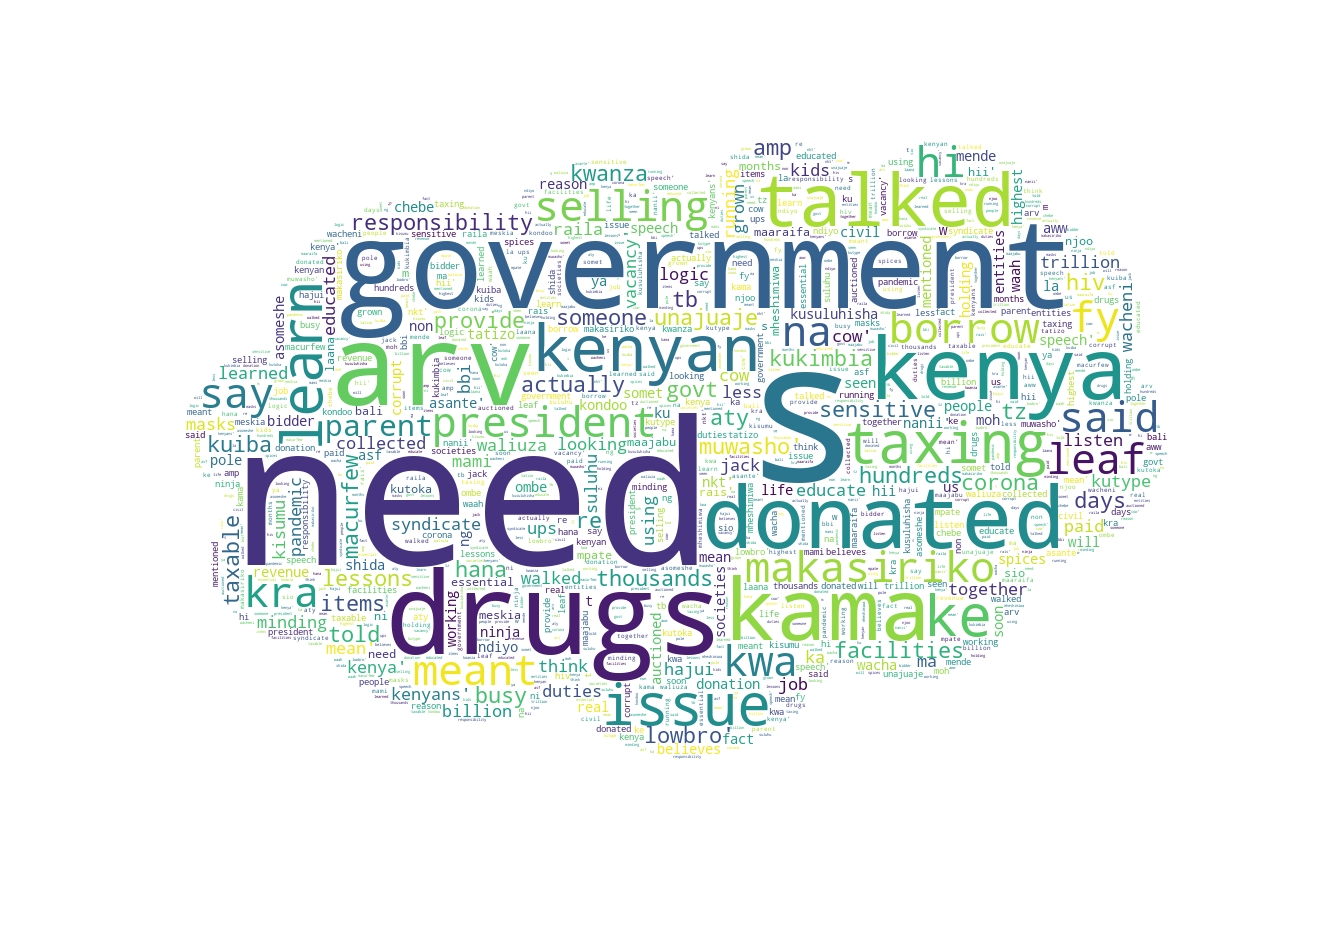

In [22]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [24]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [25]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,111.53
neutral,40.87
positive,66.02


In [26]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,20.79
neutral,6.45
positive,11.12


In [27]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [28]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [29]:
import nltk
nltk.download('stopwords')

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mutua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [31]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [32]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@KeyaMercy @jumaf3 @KRACorporate @StateHouseKe...,kenya arvs are not free the cost is...,-0.2,0.8,negative,0.197,0.803,0.000,-0.4023,73,13,kenya arvs are not free the cost is...,"[, kenya, arvs, are, not, free, the, cost, is,...","[, kenya, arvs, free, cost, catered, donors, ]","[, kenya, arv, free, cost, cater, donor, ]"
1,@PManjeru @jumaf3 @KRACorporate Government is ...,government is incapable of helping every...,0.0,0.0,negative,0.165,0.696,0.139,-0.1027,92,13,government is incapable of helping every...,"[, government, is, incapable, of, helping, eve...","[, government, incapable, helping, everyone, c...","[, govern, incap, help, everyon, countri, real..."
2,RT @jumaf3: There is no ARV in Kenya. You know...,there is no arv in kenya you know why becau...,0.0,0.0,negative,0.170,0.830,0.000,-0.4767,117,22,there is no arv in kenya you know why becau...,"[, there, is, no, arv, in, kenya, you, know, w...","[, arv, kenya, know, demanding, ksh, million, ...","[, arv, kenya, know, demand, ksh, million, tax..."
3,RT @jumaf3: There is no ARV in Kenya. You know...,there is no arv in kenya you know why becau...,0.0,0.0,negative,0.170,0.830,0.000,-0.4767,117,22,there is no arv in kenya you know why becau...,"[, there, is, no, arv, in, kenya, you, know, w...","[, arv, kenya, know, demanding, ksh, million, ...","[, arv, kenya, know, demand, ksh, million, tax..."
4,RT @jumaf3: There is no ARV in Kenya. You know...,there is no arv in kenya you know why becau...,0.0,0.0,negative,0.170,0.830,0.000,-0.4767,117,22,there is no arv in kenya you know why becau...,"[, there, is, no, arv, in, kenya, you, know, w...","[, arv, kenya, know, demanding, ksh, million, ...","[, arv, kenya, know, demand, ksh, million, tax..."


In [33]:
tw_list.to_csv("KRAtweets.csv")

In [34]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

500 Number of reviews has 500 words


In [35]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,absolut,activ,actual,address,african,aid,aki,al,alarm,...,work,worker,world,would,wow,ya,ye,yeah,yet,zilip
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
kenya,359
tax,356
arv,350
drug,349
know,347
donor,345
demand,344
million,342
ksh,342
donat,10


In [37]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [38]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('arv kenya', 342),
 ('kenya know', 342),
 ('know demanding', 342),
 ('demanding ksh', 342),
 ('ksh 530', 342),
 ('530 million', 342),
 ('million taxes', 342),
 ('taxes donors', 342),
 ('donors drugs', 342),
 ('dear learn', 3),
 ('learn president', 3),
 ('president ama', 3),
 ('tax donations', 3),
 ('unfortunate doing', 3),
 ('doing month', 3),
 ('month tcas', 3),
 ('tcas county', 3),
 ('county referral', 3),
 ('referral hospitals', 3),
 ('hospitals stocks', 3)]

In [39]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('arv kenya know', 342),
 ('kenya know demanding', 342),
 ('know demanding ksh', 342),
 ('demanding ksh 530', 342),
 ('ksh 530 million', 342),
 ('530 million taxes', 342),
 ('million taxes donors', 342),
 ('taxes donors drugs', 342),
 ('dear learn president', 3),
 ('learn president ama', 3),
 ('unfortunate doing month', 3),
 ('doing month tcas', 3),
 ('month tcas county', 3),
 ('tcas county referral', 3),
 ('county referral hospitals', 3),
 ('referral hospitals stocks', 3),
 ('hospitals stocks unsustainab', 3),
 ('yes shameless asking', 3),
 ('shameless asking 530m', 3),
 ('asking 530m taxation', 3)]